<a href="https://colab.research.google.com/github/mashrur100/SIM_LAB_TEST/blob/main/Lab_Test_1_(Set_A)%5B7A2%5D1074.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_1samp

data = {
    "Customer_ID": np.arange(1, 21),
    "Daily_Arrivals": [8, 12, 10, 15, 9, 13, 11, 14, 7, 16,
                       10, 12, 9, 15, 11, 13, 14, 8, 12, 10]
}

df = pd.DataFrame(data)

mean_arrivals = df['Daily_Arrivals'].mean()
pop_var = df['Daily_Arrivals'].var(ddof=0)
sample_var = df['Daily_Arrivals'].var(ddof=1)
pop_std = np.sqrt(pop_var)
sample_std = np.sqrt(sample_var)

print("=== Basic Statistics ===")
print(f"Mean Daily Arrivals: {mean_arrivals:.2f}")
print(f"Population Variance: {pop_var:.2f}")
print(f"Sample Variance: {sample_var:.2f}")
print(f"Population Std Dev: {pop_std:.2f}")
print(f"Sample Std Dev: {sample_std:.2f}\n")

print("Note:")
print("Population variance divides by N, sample variance divides by N-1 to reduce bias.\n")


=== Basic Statistics ===
Mean Daily Arrivals: 11.45
Population Variance: 6.35
Sample Variance: 6.68
Population Std Dev: 2.52
Sample Std Dev: 2.58

Note:
Population variance divides by N, sample variance divides by N-1 to reduce bias.



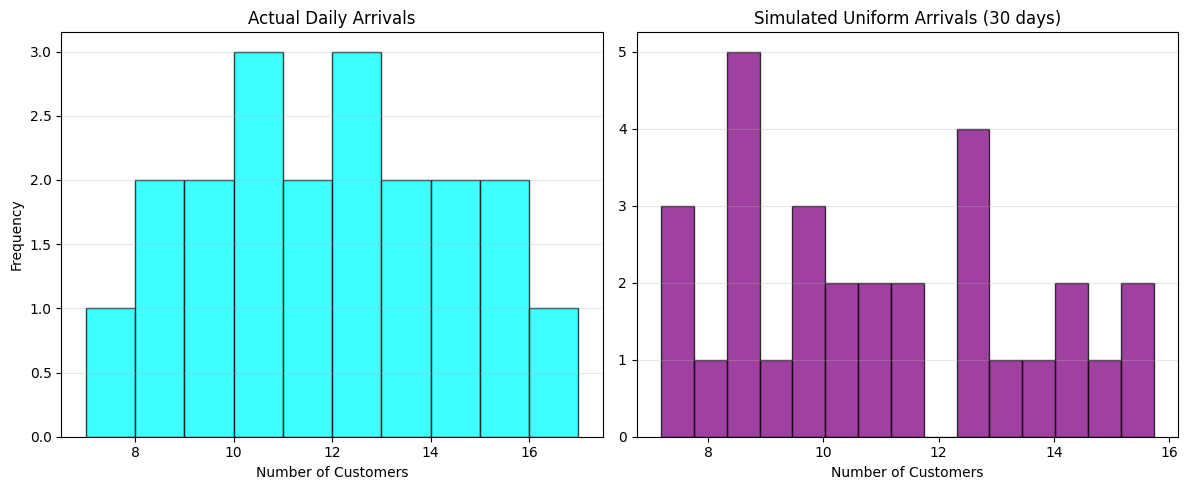

In [11]:
import numpy as np
import matplotlib.pyplot as plt

min_arrivals = df['Daily_Arrivals'].min()
max_arrivals = df['Daily_Arrivals'].max()

np.random.seed(42)
simulated_arrivals = np.random.uniform(low=min_arrivals, high=max_arrivals, size=30)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].hist(df['Daily_Arrivals'], bins=range(min_arrivals, max_arrivals + 2),
             color='cyan', edgecolor='black', alpha=0.75)
axes[0].set_title("Actual Daily Arrivals")
axes[0].set_xlabel("Number of Customers")
axes[0].set_ylabel("Frequency")
axes[0].grid(axis='y', alpha=0.3)

axes[1].hist(simulated_arrivals, bins=15, color='purple', edgecolor='black', alpha=0.75)
axes[1].set_title("Simulated Uniform Arrivals (30 days)")
axes[1].set_xlabel("Number of Customers")
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


In [3]:
import numpy as np

# Example min and max arrivals, define these first
min_arrivals = 7
max_arrivals = 16

# Monte Carlo simulation
mc_samples = np.random.uniform(low=min_arrivals, high=max_arrivals, size=100000)
probability_gt_15 = np.mean(mc_samples > 15)

print("Monte Carlo Simulation:")
print(f"Estimated Probability that arrivals exceed 15 = {probability_gt_15:.4f}\n")


Monte Carlo Simulation:
Estimated Probability that arrivals exceed 15 = 0.1114



=== Hypothesis Testing ===
Hypothesized Mean: 14
t-statistic: -4.4118
p-value: 0.0003
Conclusion: Reject null hypothesis — mean arrivals differ significantly from hypothesized mean.


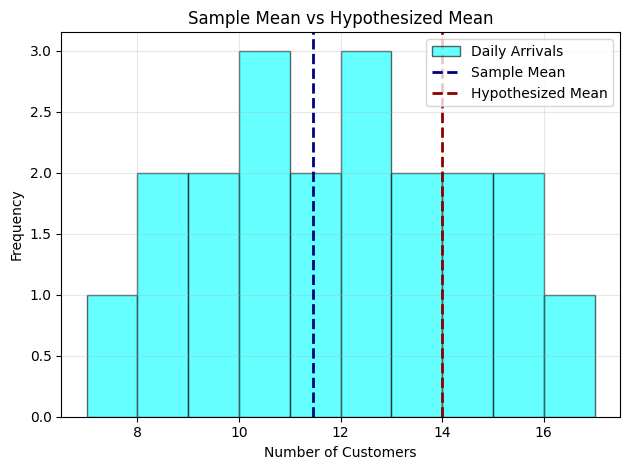


Interpretation:
Given the p-value = 0.0003, we reject the null hypothesis that the mean daily arrivals equal 14.
This suggests that the average daily arrivals is not consistent with the hypothesized mean based on your Student ID.


In [12]:
from scipy.stats import ttest_1samp
import matplotlib.pyplot as plt

student_id_last_3 = 174
hypothesized_mean = (student_id_last_3 % 10) + 10

t_stat, p_val = ttest_1samp(df['Daily_Arrivals'], hypothesized_mean)

print("=== Hypothesis Testing ===")
print(f"Hypothesized Mean: {hypothesized_mean}")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_val:.4f}")

if p_val < 0.05:
    conclusion = "Reject null hypothesis — mean arrivals differ significantly from hypothesized mean."
else:
    conclusion = "Fail to reject null hypothesis — insufficient evidence to say means differ."

print("Conclusion:", conclusion)

plt.hist(df['Daily_Arrivals'], bins=range(min_arrivals, max_arrivals + 2),
         alpha=0.6, color='cyan', edgecolor='black', label="Daily Arrivals")
plt.axvline(mean_arrivals, color='navy', linestyle='--', linewidth=2, label='Sample Mean')
plt.axvline(hypothesized_mean, color='darkred', linestyle='--', linewidth=2, label='Hypothesized Mean')
plt.title("Sample Mean vs Hypothesized Mean")
plt.xlabel("Number of Customers")
plt.ylabel("Frequency")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("\nInterpretation:")
print(f"Given the p-value = {p_val:.4f}, we",
      "reject" if p_val < 0.05 else "fail to reject",
      f"the null hypothesis that the mean daily arrivals equal {hypothesized_mean}.")
print("This suggests that the average daily arrivals",
      "is" if p_val >= 0.05 else "is not",
      "consistent with the hypothesized mean based on your Student ID.")
